In [280]:
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, precision_score

## Dish List

In [281]:
dish_labels = []
with open('../datasets/VireoFood172/FoodList.txt','r') as f:
    for line in f:
        dish_labels.append(line.replace('\n',''))

## Confusion Matrix

If the confusion matrix is normalized by row, the result in the diagonal is the precision value.

### Dish Classification

#### Multi Task Baseline

In [282]:
test_dish_labels = []
with open('../datasets/VireoFood172/meta/test_dish_lbls.txt','r') as f:
    for line in f:
        test_dish_labels.append(line.replace('\n',''))
        
test_dish_predictions = []
with open('../results/precision_dishes/pred_food_multitask.txt','r') as f:
    for line in f:
        test_dish_predictions.append(line.replace('\n',''))

In [283]:
cm_1 = confusion_matrix(test_dish_labels,test_dish_predictions)
cm_1 = cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each dish (first 10)\n')
mtl_prec_dish = cm_1.diagonal()
mtl_prec_dish[:10]

Confusion Matrix

[[0.78827362 0.00651466 0.         ... 0.         0.         0.        ]
 [0.01010101 0.61952862 0.         ... 0.02356902 0.003367   0.        ]
 [0.         0.00462963 0.75462963 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.83695652 0.         0.        ]
 [0.         0.         0.         ... 0.         0.95266272 0.        ]
 [0.         0.01020408 0.         ... 0.         0.         0.5       ]]

Precision for each dish (first 10)



array([0.78827362, 0.61952862, 0.75462963, 0.93452381, 0.82051282,
       0.63815789, 0.91011236, 0.9223301 , 0.58181818, 0.81707317])

In [284]:
mtl_prec_dish = precision_score(test_dish_labels, test_dish_predictions, average=None)

#### Dish-Ingredient Probabilities

In [285]:
test_dish_predictions = []
with open('../results/precision_dishes/pred_food_multitask_dish_ingr_ont.txt','r') as f:
    for line in f:
        test_dish_predictions.append(line.replace('\n',''))

In [286]:
cm_1 = confusion_matrix(test_dish_labels,test_dish_predictions)
cm_1 = cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each dish (first 10)\n')
di_prob_prec_dish = cm_1.diagonal()
di_prob_prec_dish[:10]

Confusion Matrix

[[0.71661238 0.         0.00325733 ... 0.00325733 0.         0.        ]
 [0.003367   0.37373737 0.00673401 ... 0.01683502 0.         0.        ]
 [0.         0.         0.87037037 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.54347826 0.         0.        ]
 [0.         0.         0.         ... 0.         0.79881657 0.        ]
 [0.         0.         0.         ... 0.         0.         0.7755102 ]]

Precision for each dish (first 10)



array([0.71661238, 0.37373737, 0.87037037, 0.88095238, 0.76923077,
       0.73684211, 0.85393258, 0.69902913, 0.47272727, 0.6402439 ])

In [287]:
di_prob_prec_dish = precision_score(test_dish_labels, test_dish_predictions, average=None)

#### Dish-Ingredient Probabilities Negative

In [288]:
test_dish_predictions = []
with open('../results/precision_dishes/pred_food_multitask_dish_ingr_ont_neg.txt','r') as f:
    for line in f:
        test_dish_predictions.append(line.replace('\n',''))

In [289]:
cm_1 = confusion_matrix(test_dish_labels,test_dish_predictions)
cm_1 = cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each dish (first 10)\n')
di_neg_prob_prec_dish = cm_1.diagonal()
di_neg_prob_prec_dish[:10]

Confusion Matrix

[[0.84039088 0.         0.         ... 0.         0.         0.        ]
 [0.003367   0.39393939 0.         ... 0.00673401 0.         0.        ]
 [0.         0.         0.84259259 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.7173913  0.         0.        ]
 [0.         0.         0.         ... 0.         0.9408284  0.        ]
 [0.         0.         0.02040816 ... 0.         0.         0.40816327]]

Precision for each dish (first 10)



array([0.84039088, 0.39393939, 0.84259259, 0.86904762, 0.80128205,
       0.82894737, 0.82022472, 0.70873786, 0.74545455, 0.73780488])

In [290]:
di_prob_neg_prec_dish = precision_score(test_dish_labels, test_dish_predictions, average=None)

#### Dish-Ingredient Ingredient-Ingredient Probabilities Negative

In [291]:
test_dish_predictions = []
with open('../results/precision_dishes/pred_food_multitask_dish_ingr_ingr_ingr_ont_neg.txt','r') as f:
    for line in f:
        test_dish_predictions.append(line.replace('\n',''))

In [292]:
cm_1 = confusion_matrix(test_dish_labels,test_dish_predictions)
cm_1 = cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each dish (first 10)\n')
di_ii_prob_neg_prec_dish = cm_1.diagonal()
di_ii_prob_neg_prec_dish[:10]

Confusion Matrix

[[0.71335505 0.         0.         ... 0.         0.         0.        ]
 [0.00673401 0.52188552 0.         ... 0.01010101 0.003367   0.        ]
 [0.         0.         0.87037037 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.66304348 0.01086957 0.        ]
 [0.         0.         0.         ... 0.         0.95857988 0.        ]
 [0.         0.         0.         ... 0.         0.         0.71428571]]

Precision for each dish (first 10)



array([0.71335505, 0.52188552, 0.87037037, 0.91666667, 0.72435897,
       0.67105263, 0.73033708, 0.84466019, 0.81212121, 0.75      ])

In [293]:
di_ii_prob_neg_prec_dish = precision_score(test_dish_labels, test_dish_predictions, average=None)

#### Ingredient-Ingredient Probabilities Negative

In [294]:
test_dish_predictions = []
with open('../results/precision_dishes/pred_food_multitask_ingr_ingr_ont_neg.txt','r') as f:
    for line in f:
        test_dish_predictions.append(line.replace('\n',''))

In [295]:
cm_1 = confusion_matrix(test_dish_labels,test_dish_predictions)
cm_1 = cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each dish (first 10)\n')
ii_prob_neg_prec_dish = cm_1.diagonal()
ii_prob_neg_prec_dish[:10]

Confusion Matrix

[[0.70358306 0.00651466 0.         ... 0.00651466 0.         0.        ]
 [0.         0.72053872 0.         ... 0.03367003 0.         0.        ]
 [0.         0.         0.8287037  ... 0.         0.         0.        ]
 ...
 [0.         0.01086957 0.         ... 0.76086957 0.         0.        ]
 [0.         0.         0.         ... 0.         0.96449704 0.        ]
 [0.         0.         0.         ... 0.         0.         0.5       ]]

Precision for each dish (first 10)



array([0.70358306, 0.72053872, 0.8287037 , 0.9047619 , 0.73717949,
       0.84210526, 0.75842697, 0.7961165 , 0.83030303, 0.88414634])

In [296]:
ii_prob_neg_prec_dish = precision_score(test_dish_labels, test_dish_predictions, average=None)

In [298]:
print('How many dishes predicts more precisely the ontology model?')
print('DI probs: ',sum(mtl_prec_dish < di_prob_prec_dish))
print('DI probs neg: ',sum(mtl_prec_dish < di_prob_neg_prec_dish))
print('II probs neg: ',sum(mtl_prec_dish < ii_prob_neg_prec_dish))
print('DI-II probs neg: ',sum(mtl_prec_dish < di_ii_prob_neg_prec_dish))

How many dishes predicts more precisely the ontology model?
DI probs:  92
DI probs neg:  87
II probs neg:  84
DI-II probs neg:  94


In [299]:
idxs = di_ii_prob_neg_prec_dish.argsort()[::-1][:10]
print(mtl_prec_dish[idxs])
di_ii_prob_neg_prec_dish[idxs]

[0.92982456 0.97101449 0.99224806 0.98275862 0.81268012 0.96531792
 0.94326241 0.93181818 0.85950413 0.73154362]


array([1.        , 1.        , 0.99152542, 0.99134199, 0.98859316,
       0.98830409, 0.98367347, 0.98245614, 0.98224852, 0.98      ])

In [373]:
idxs = (di_ii_prob_neg_prec_dish - mtl_prec_dish).argsort()[::-1][np.r_[3,4,6,7,9:12,15,16]]
sel_dishes_labels = np.array(dish_labels)[idxs.astype(int)].tolist()
print(sel_dishes_labels)
sel_mtl_prec_dish = mtl_prec_dish[idxs]
print(sel_mtl_prec_dish)
sel_di_ii_prob_neg_prec_dish = di_ii_prob_neg_prec_dish[idxs]
print(sel_di_ii_prob_neg_prec_dish)

['Roast chicken wings', 'Beef Kebabs', 'Saute Spicy Chicken', 'Kung Pao Chicken', 'Spicy shrump ', 'Yu-Shiang Shredded Pork', 'Deep-Fried Fermented Tofu', 'Shredded chicken', 'Roast leek']
[0.53314121 0.64435146 0.43304348 0.57462687 0.60858586 0.75
 0.64732143 0.73103448 0.61052632]
[0.84946237 0.96       0.73103448 0.86705202 0.83972125 0.97014925
 0.86554622 0.93859649 0.81428571]


In [374]:
idxs

array([ 25,  60,  24,  22,  52,   6,  83,  30, 124], dtype=int64)

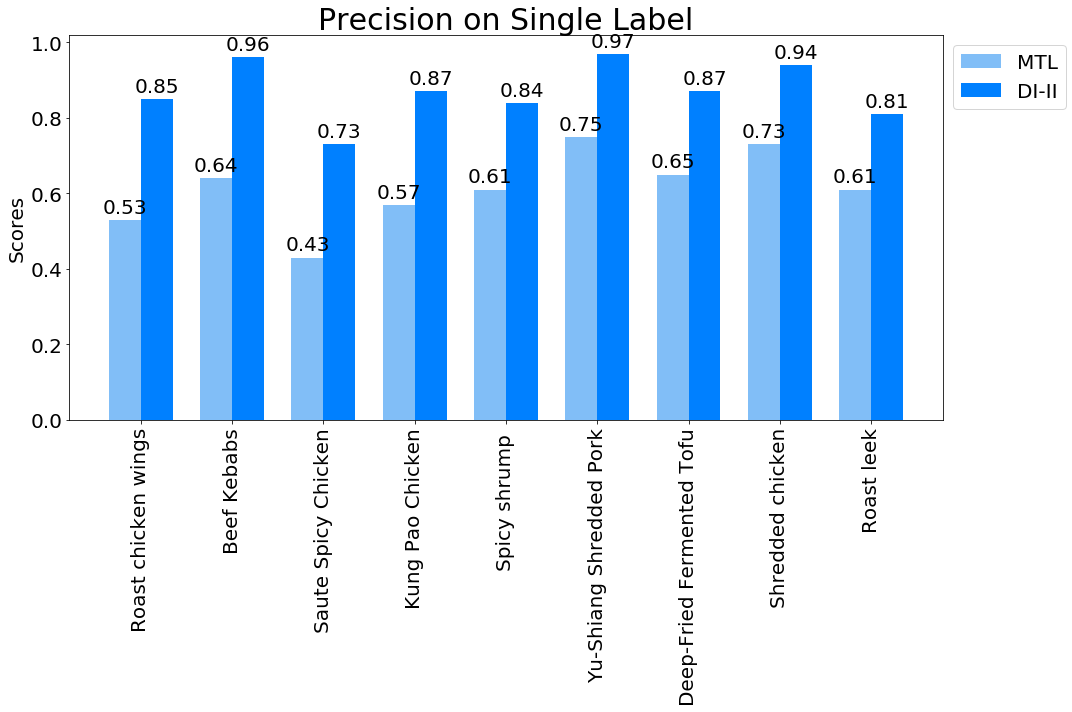

In [365]:
SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

#sel_dishes_labels
sel_mtl_prec_dish = [round(i,2) for i in sel_mtl_prec_dish]
sel_di_ii_prob_neg_prec_dish = [round(i,2) for i in sel_di_ii_prob_neg_prec_dish]

x = np.arange(len(sel_dishes_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, sel_mtl_prec_dish, width, label='MTL', color='#81BEF7')
rects2 = ax.bar(x + width/2, sel_di_ii_prob_neg_prec_dish, width, label='DI-II', color='#0080FF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', size=MEDIUM_SIZE)
ax.set_title('Precision on Single Label', size=BIGGER_SIZE)
ax.set_xticks(x)
ax.set_xticklabels(sel_dishes_labels, rotation=90, size=MEDIUM_SIZE)
ax.legend(fontsize=MEDIUM_SIZE,loc='upper left', bbox_to_anchor=(1,1))
ax.tick_params(labelsize=MEDIUM_SIZE)


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=MEDIUM_SIZE)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig('precision_SL_comparison.jpeg')

plt.show()

## Ingredient List

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html

In [336]:
ingredient_labels = []
ingredient_idx = []
with open('../datasets/VireoFood172/IngredientList.txt','r') as f:
    for i, line in enumerate(f):
        ingredient_labels.append(line.replace('\n',''))
        ingredient_idx.append(i)

### Binarizer

In [337]:
#transform the multilabel classification results into a binarized label
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(np.array(ingredient_idx).reshape(1,-1)) #fit the binarizer with the ingredient labels in dataset

MultiLabelBinarizer(classes=None, sparse_output=False)

In [338]:
def binarize_labels(list_labels, binarizer):
    sublist = [labels.split(',') for labels in list_labels]

    ingr_list = []
    for i in sublist:
        new_sublist = []
        for elem in i:
            new_sublist.append(int(elem))
        ingr_list.append(np.array(new_sublist))
    ingr_list = np.array(ingr_list)
    
    bin_list_labels = binarizer.transform(ingr_list)
    
    return bin_list_labels

### Ingredient Classification

#### Test GT

In [339]:
test_ingr_labels = []
with open('../datasets/VireoFood172/meta/test_ing_lbls_3.txt','r') as f:
    for line in f:
        test_ingr_labels.append(line.replace('\n',''))
        
bin_test_ingr_labels = binarize_labels(test_ingr_labels, mlb)

#### Multi Task Baseline

In [340]:
test_ingr_predictions = []
with open('../results/precision_ingredients/pred_food_multitask.txt','r') as f:
    for line in f:
        test_ingr_predictions.append(line.replace('\n',''))
        
bin_test_ingr_predictions = binarize_labels(test_ingr_predictions, mlb)

In [341]:
cm_1 = multilabel_confusion_matrix(bin_test_ingr_labels, bin_test_ingr_predictions)
cm_1 = np.array([cm.astype('float') / cm.sum(axis=1) for cm in cm_1 if cm.sum(axis=1)[0] != 0])
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each ingredient (first 10)\n')
mtl_prec_ingr = cm_1[:,0,0]
mtl_prec_ingr[:10]

Confusion Matrix

[[[7.55594194e-01 9.65362795e-01]
  [4.39219837e-02 8.26515378e-01]]

 [[9.81593204e-01 8.97897898e-01]
  [7.41812361e-03 6.38138138e-01]]

 [[9.38284551e-01 2.73734610e+00]
  [1.06714369e-02 5.26675787e-01]]

 ...

 [[9.99606192e-01 9.09090909e-02]
  [3.02929327e-04 9.30069930e-01]]

 [[9.99094449e-01 1.20000000e+00]
  [7.54625857e-04 0.00000000e+00]]

 [[1.00000000e+00 0.00000000e+00]
  [6.03281853e-05 0.00000000e+00]]]

Precision for each ingredient (first 10)



array([0.75559419, 0.9815932 , 0.93828455, 0.99857619, 0.99764663,
       0.99966811, 1.        , 0.99806693, 0.98494704, 0.9906371 ])

In [342]:
mtl_prec_ingr = precision_score(bin_test_ingr_labels, bin_test_ingr_predictions, average=None)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Dish-Ingredient Probabilities

In [343]:
test_ingr_predictions = []
with open('../results/precision_ingredients/pred_food_multitask_dish_ingr_ont.txt','r') as f:
    for line in f:
        test_ingr_predictions.append(line.replace('\n',''))
        
bin_test_ingr_predictions = binarize_labels(test_ingr_predictions, mlb)

In [344]:
cm_1 = multilabel_confusion_matrix(bin_test_ingr_labels, bin_test_ingr_predictions)
cm_1 = np.array([cm.astype('float') / cm.sum(axis=1) for cm in cm_1 if cm.sum(axis=1)[0] != 0])
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each ingredient (first 10)\n')
di_prob_prec_ingr = cm_1[:,0,0]
di_prob_prec_ingr[:10]

Confusion Matrix

[[[5.56168733e-01 1.75306062e+00]
  [1.65935894e-02 9.34458047e-01]]

 [[9.32128786e-01 3.31081081e+00]
  [4.49396700e-03 7.80780781e-01]]

 [[9.49634519e-01 2.23392613e+00]
  [1.19359714e-02 4.70588235e-01]]

 ...

 [[9.99727364e-01 6.29370629e-02]
  [5.75565721e-04 8.67132867e-01]]

 [[9.99366114e-01 8.40000000e-01]
  [7.54625857e-04 0.00000000e+00]]

 [[9.99939672e-01 1.00000000e+00]
  [6.03281853e-05 0.00000000e+00]]]

Precision for each ingredient (first 10)



array([0.55616873, 0.93212879, 0.94963452, 0.9985156 , 0.99205355,
       0.99858195, 0.99954724, 0.99809714, 0.96112866, 0.98408003])

In [345]:
di_prob_prec_ingr = precision_score(bin_test_ingr_labels, bin_test_ingr_predictions, average=None)

#### Dish-Ingredient Probabilities Negative

In [346]:
test_ingr_predictions = []
with open('../results/precision_ingredients/pred_food_multitask_dish_ingr_ingr_ingr_ont_neg.txt','r') as f:
    for line in f:
        test_ingr_predictions.append(line.replace('\n',''))
        
bin_test_ingr_predictions = binarize_labels(test_ingr_predictions, mlb)

In [347]:
cm_1 = multilabel_confusion_matrix(bin_test_ingr_labels, bin_test_ingr_predictions)
cm_1 = np.array([cm.astype('float') / cm.sum(axis=1) for cm in cm_1 if cm.sum(axis=1)[0] != 0])
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each ingredient (first 10)\n')
di_prob_neg_prec_ingr = cm_1[:,0,0]
di_prob_neg_prec_ingr[:10]

Confusion Matrix

[[[6.05760508e-01 1.55718125e+00]
  [1.71605685e-02 9.32218573e-01]]

 [[9.68665353e-01 1.52852853e+00]
  [5.20192071e-03 7.46246246e-01]]

 [[9.36372328e-01 2.82216142e+00]
  [1.08564908e-02 5.18467852e-01]]

 ...

 [[9.99818242e-01 4.19580420e-02]
  [7.27030384e-04 8.32167832e-01]]

 [[9.99969815e-01 4.00000000e-02]
  [7.54625857e-04 0.00000000e+00]]

 [[1.00000000e+00 0.00000000e+00]
  [6.03281853e-05 0.00000000e+00]]]

Precision for each ingredient (first 10)



array([0.60576051, 0.96866535, 0.93637233, 0.99909118, 0.99394847,
       1.        , 1.        , 0.99719101, 0.9536951 , 0.98063375])

In [348]:
di_prob_neg_prec_ingr = precision_score(bin_test_ingr_labels, bin_test_ingr_predictions, average=None)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Ingredient-Ingredient Probabilities Negative

In [349]:
test_ingr_predictions = []
with open('../results/precision_ingredients/pred_food_multitask_ingr_ingr_ont_neg.txt','r') as f:
    for line in f:
        test_ingr_predictions.append(line.replace('\n',''))
        
bin_test_ingr_predictions = binarize_labels(test_ingr_predictions, mlb)

In [350]:
cm_1 = multilabel_confusion_matrix(bin_test_ingr_labels, bin_test_ingr_predictions)
cm_1 = np.array([cm.astype('float') / cm.sum(axis=1) for cm in cm_1 if cm.sum(axis=1)[0] != 0])
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each ingredient (first 10)\n')
ii_prob_neg_prec_ingr = cm_1[:,0,0]
ii_prob_neg_prec_ingr[:10]

Confusion Matrix

[[[7.42893862e-01 1.01552702e+00]
  [3.39431509e-02 8.65930128e-01]]

 [[9.86887466e-01 6.39639640e-01]
  [7.84905196e-03 6.17117117e-01]]

 [[9.88064029e-01 5.29411765e-01]
  [1.73642168e-02 2.29822161e-01]]

 ...

 [[9.99182091e-01 1.88811189e-01]
  [2.42343461e-04 9.44055944e-01]]

 [[9.99879260e-01 1.60000000e-01]
  [7.54625857e-04 0.00000000e+00]]

 [[1.00000000e+00 0.00000000e+00]
  [6.03281853e-05 0.00000000e+00]]]

Precision for each ingredient (first 10)



array([0.74289386, 0.98688747, 0.98806403, 0.99588004, 0.99694367,
       1.        , 1.        , 0.99966775, 0.9771418 , 0.98404953])

In [351]:
ii_prob_neg_prec_ingr = precision_score(bin_test_ingr_labels, bin_test_ingr_predictions, average=None)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Dish-Ingredient Ingredient-Ingredient Probabilities Negative

In [352]:
test_ingr_predictions = []
with open('../results/precision_ingredients/pred_food_multitask_dish_ingr_ingr_ingr_ont_neg.txt','r') as f:
    for line in f:
        test_ingr_predictions.append(line.replace('\n',''))
        
bin_test_ingr_predictions = binarize_labels(test_ingr_predictions, mlb)

In [353]:
cm_1 = multilabel_confusion_matrix(bin_test_ingr_labels, bin_test_ingr_predictions)
cm_1 = np.array([cm.astype('float') / cm.sum(axis=1) for cm in cm_1 if cm.sum(axis=1)[0] != 0])
print('Confusion Matrix\n')
print(cm_1)
print('\nPrecision for each ingredient (first 10)\n')
di_ii_prob_neg_prec_ingr = cm_1[:,0,0]
di_ii_prob_neg_prec_ingr[:10]

Confusion Matrix

[[[6.05760508e-01 1.55718125e+00]
  [1.71605685e-02 9.32218573e-01]]

 [[9.68665353e-01 1.52852853e+00]
  [5.20192071e-03 7.46246246e-01]]

 [[9.36372328e-01 2.82216142e+00]
  [1.08564908e-02 5.18467852e-01]]

 ...

 [[9.99818242e-01 4.19580420e-02]
  [7.27030384e-04 8.32167832e-01]]

 [[9.99969815e-01 4.00000000e-02]
  [7.54625857e-04 0.00000000e+00]]

 [[1.00000000e+00 0.00000000e+00]
  [6.03281853e-05 0.00000000e+00]]]

Precision for each ingredient (first 10)



array([0.60576051, 0.96866535, 0.93637233, 0.99909118, 0.99394847,
       1.        , 1.        , 0.99719101, 0.9536951 , 0.98063375])

In [354]:
di_ii_prob_neg_prec_ingr = precision_score(bin_test_ingr_labels, bin_test_ingr_predictions, average=None)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [371]:
print('How many ingredients predicts more precisely the ontology model?')
print('DI probs: ',sum(mtl_prec_ingr < di_prob_prec_ingr))
print('DI probs neg: ',sum(mtl_prec_ingr < di_prob_neg_prec_ingr))
print('II probs neg: ',sum(mtl_prec_ingr < ii_prob_neg_prec_ingr))
print('DI-II probs neg: ',sum(mtl_prec_ingr < di_ii_prob_neg_prec_ingr))

How many ingredients predicts more precisely the ontology model?
DI probs:  149
DI probs neg:  150
II probs neg:  168
DI-II probs neg:  150


In [356]:
idxs = (di_ii_prob_neg_prec_ingr - mtl_prec_ingr).argsort()[::-1][:10]
sel_ingr_labels = np.array(ingredient_labels)[idxs.astype(int)].tolist()
print(sel_ingr_labels)
sel_mtl_prec_ingr = mtl_prec_ingr[idxs]
print(sel_mtl_prec_ingr)
sel_di_ii_prob_neg_prec_ingr = di_ii_prob_neg_prec_ingr[idxs]
print(sel_di_ii_prob_neg_prec_ingr)

['Spiced corned egg', 'Shredded chicken', 'Bullfrog', 'White fungus', 'Egg drop', 'Laver', 'Chicken chunks', 'Pork leg', 'Steamed Bun', 'Black rice']
[0.31135531 0.31171171 0.3206951  0.39379475 0.46381579 0.47474747
 0.32229496 0.28385699 0.6635514  0.14414414]
[0.82089552 0.81578947 0.70725995 0.75348837 0.82278481 0.81761006
 0.6531401  0.60511364 0.96785714 0.44444444]


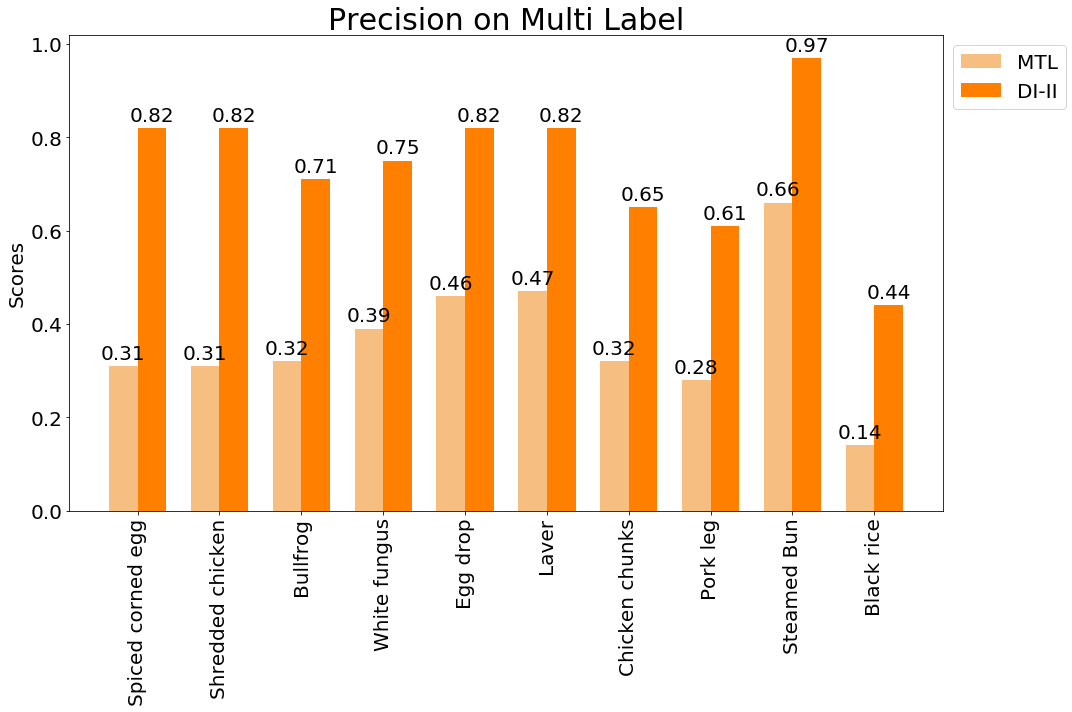

In [364]:
SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

sel_mtl_prec_ingr = [round(i,2) for i in sel_mtl_prec_ingr]
sel_di_ii_prob_neg_prec_ingr = [round(i,2) for i in sel_di_ii_prob_neg_prec_ingr]

x = np.arange(len(sel_ingr_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, sel_mtl_prec_ingr, width, label='MTL', color='#F7BE81')
rects2 = ax.bar(x + width/2, sel_di_ii_prob_neg_prec_ingr, width, label='DI-II', color='#FF8000')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', size=MEDIUM_SIZE)
ax.set_title('Precision on Multi Label', size=BIGGER_SIZE)
ax.set_xticks(x)
ax.set_xticklabels(sel_ingr_labels, rotation=90, size=MEDIUM_SIZE)
ax.legend(fontsize=MEDIUM_SIZE,loc='upper left', bbox_to_anchor=(1,1))
ax.tick_params(labelsize=MEDIUM_SIZE)


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=MEDIUM_SIZE)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig('precision_ML_comparison.jpeg')

plt.show()